<a href="https://colab.research.google.com/github/sowmR/PILSample/blob/main/PILSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

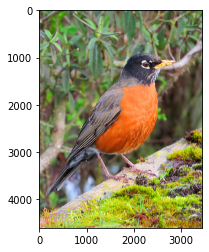

In [36]:
# update the file path to the actual image location before running the below statement
imageFile = "./robin_bird_birding_nature.jpg"
image = PIL.Image.open(imageFile)
plt.imshow(image)

In [11]:
print(image.size)
print(image.mode)
print(image.format)

(3456, 4608)
RGB
JPEG


In [12]:
# save image
newImg = image.save('newImage.jpg')

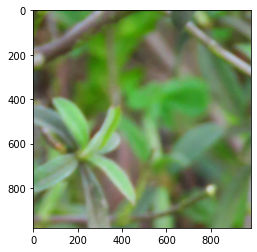

In [14]:
#crop image
left = 20
top = 20
right = 1000
bottom =1000
crpImg = image.crop((left,top,right,bottom))
plt.imshow(crpImg)

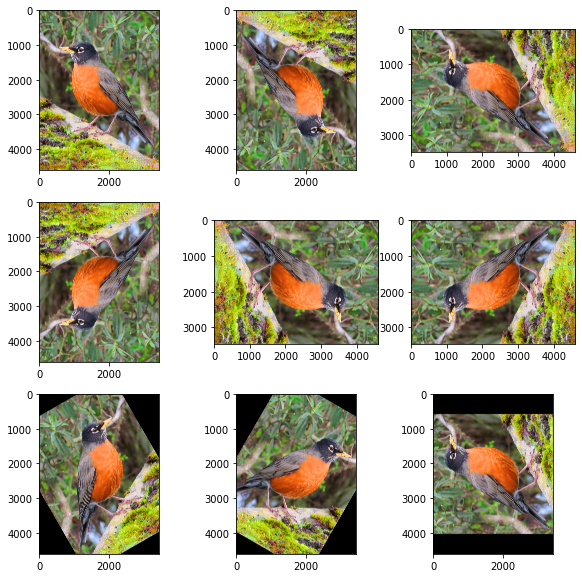

In [19]:
# make a copy of the image
copiedImg = image.copy()
# Transposing
ti1 = image.transpose(PIL.Image.FLIP_LEFT_RIGHT)
ti2 = image.transpose(PIL.Image.FLIP_TOP_BOTTOM)
ti3 = image.transpose(PIL.Image.ROTATE_90)
ti4 = image.transpose(PIL.Image.ROTATE_180)
ti5 = image.transpose(PIL.Image.ROTATE_270)
ti6 = image.transpose(PIL.Image.TRANSPOSE)
ti7 = image.rotate(30)
ti8 = image.rotate(-30)
ti9 = image.rotate(90)
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(ti1)
plt.subplot(3,3,2)
plt.imshow(ti2)
plt.subplot(3,3,3)
plt.imshow(ti3)
plt.subplot(3,3,4)
plt.imshow(ti4)
plt.subplot(3,3,5)
plt.imshow(ti5)
plt.subplot(3,3,6)
plt.imshow(ti6)
plt.subplot(3,3,7)
plt.imshow(ti7)
plt.subplot(3,3,8)
plt.imshow(ti8)
plt.subplot(3,3,9)
plt.imshow(ti9)

## resize

 Image can be resized with respect to width and height.

 resize will take the width and height as tuple

 Reducing or increasing the size involves various algorithms called interpolation.

 ### Available Interpolation techniques:

  **Nearest** : It is the simplest. But poor quality. Pick one nearest pixel from the input image and ignore the rest.

  **BOX** :  Each pixel in the source image = (pixel in destination image) X (identical weight). Not a recommented option

  **BiLinear** : Decent quality. For resize calculate the output pixel value using linear interpolation of all pixels that may contribute to the output valie

  **hamming** : Produce a sharper image than BiLinear, doesn't have dislocation of the local level like in BOX

  **bicubic** : expensive in time-wise. Better quality. Sharper image.

  **lanczos** : expensive  in terms of time. Better quality. Sharper image


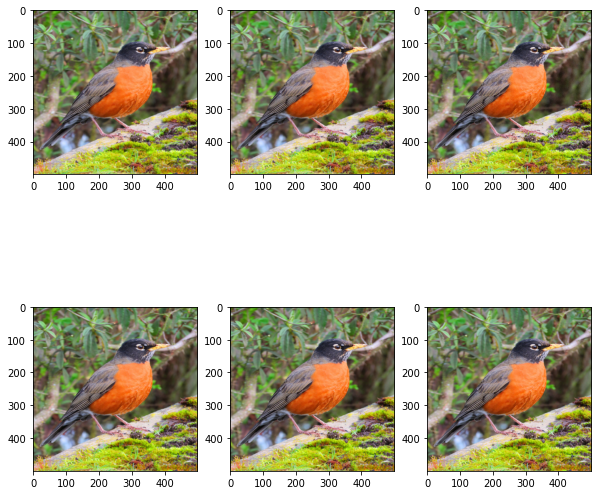

In [17]:
# resizing the image
newsize = (500,500)
ri1 = image.resize(newsize, PIL.Image.BILINEAR)
ri2 = image.resize(newsize, PIL.Image.BOX)
ri3 = image.resize(newsize, PIL.Image.NEAREST)
ri4 = image.resize(newsize, PIL.Image.HAMMING)
ri5 = image.resize(newsize, PIL.Image.BICUBIC)
ri6 = image.resize(newsize, PIL.Image.LANCZOS)

plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(ri1)
plt.subplot(2,3,2)
plt.imshow(ri2)
plt.subplot(2,3,3)
plt.imshow(ri3)
plt.subplot(2,3,4)
plt.imshow(ri4)
plt.subplot(2,3,5)
plt.imshow(ri5)
plt.subplot(2,3,6)
plt.imshow(ri6)

## Add water mark

Required functions ImageDraw, ImageFont


ImageFont is used to set the font for the overlayed text

**Syntax**: PIL.ImageFont.truetype(font=None, size=10, index=0, encoding=”)

*Parameters*:

font – A truetype font file. Under Windows, if the file is not found in this filename, the loader also looks in Windows fonts/ directory.

size – The requested size, in points.

index – Which font face to load (default is first available face).

encoding – Which font encoding to use (default is Unicode).

Returns: A font object.

Exception: IOError – If the file could not be read.




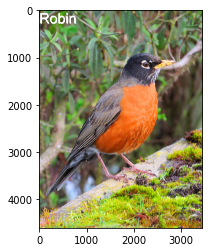

In [43]:
# add water mark
from PIL import ImageDraw, ImageFont
wi = image.copy()
imdraw = ImageDraw.Draw(wi)
fnt = ImageFont.truetype("arial.ttf",300) # set font type and size

#(position, text, textcolor, font)
# position = (left, top)
# textcolor = (r,g,b)
imdraw.text((5,5), "Robin",(255,255,255),fnt)
plt.imshow(wi)